In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
# from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [5]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 228s 20us/step


## Understand data

In [6]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training_data = 60000 images
Testing _data = 10000 images
each image is 28 by 28 size

In [7]:
# print 10 th image from X train

print(X_train[9])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0 189 190   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0 143 247 153   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 136 247 242  86   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 192 252 187   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  62 185  18   

In [8]:
X_train[9].shape

(28, 28)

This is 7


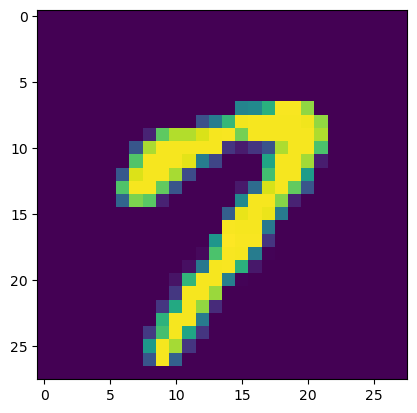

In [12]:
# display image

plt.imshow(X_train[15])
print(f'This is {Y_train[15]}')

In [16]:
# image labels

print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [17]:
# unique values in y train

print(np.unique(Y_train))

[0 1 2 3 4 5 6 7 8 9]


In [18]:
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]


 all the images have the same dimention in this data set
 is not we have to resize all images to same shape

## Preprocessing data 

In [19]:
# normalize data to between 0 and 1

X_train = X_train/255
X_test = X_test/255

In [20]:
print(X_train[9])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

## Model 

In [21]:
 model = keras.Sequential([
     
     keras.layers.Flatten(input_shape=(28,28)), # input layert
     keras.layers.Dense(50, activation='relu'),
     keras.layers.Dense(50, activation='relu'),
     keras.layers.Dense(10, activation='sigmoid') # output layer
          
 ])

In [23]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 2ms/step - loss: 0.2983 - accuracy: 0.9138
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1368 - accuracy: 0.9591
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1025 - accuracy: 0.9682
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0836 - accuracy: 0.9745
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0683 - accuracy: 0.9788
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0602 - accuracy: 0.9808
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0512 - accuracy: 0.9840
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0458 - accuracy: 0.9858
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0401 - accuracy: 0.9866
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.034

## Evaluate the model 

In [26]:
loss, accuracy = model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.1024 - accuracy: 0.9720


In [27]:
print("Test data accuracy: ",accuracy)

Test data accuracy:  0.972000002861023


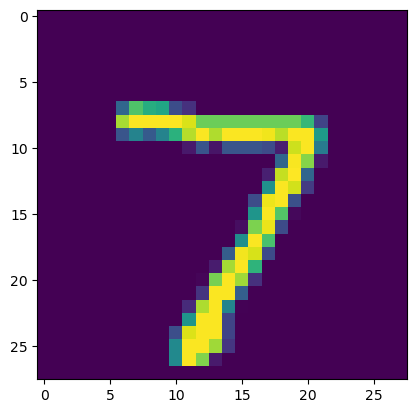

In [28]:
# first data point in test data

plt.imshow(X_test[0])
plt.show()

In [30]:
print(Y_test[0])

7


In [31]:
# predicted vlues for x test
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [32]:
Y_pred.shape

(10000, 10)

In [34]:
# solution type

print(Y_pred[0])

[2.0490757e-03 7.6606494e-01 3.4038895e-01 7.0491368e-01 5.2200525e-05
 3.3230570e-04 7.3980617e-09 9.9999893e-01 1.5497367e-02 1.9385047e-01]


In [36]:
label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [37]:
# converting the prediction probability to class labels

Y_pred_labels = [np.argmax(i) for i in Y_pred]

In [39]:
#print(Y_pred_labels)

In [40]:
# confusion matrix

confusion_mat = confusion_matrix(Y_test, Y_pred_labels)

In [41]:
print(confusion_mat)

tf.Tensor(
[[ 970    1    0    0    2    1    1    2    3    0]
 [   0 1122    1    2    0    2    2    1    4    1]
 [   5    0  996    1    6    1    1    8   13    1]
 [   0    0    5  967    0   19    0    4    7    8]
 [   1    0    1    1  974    0    1    0    1    3]
 [   2    0    0    4    2  875    4    1    3    1]
 [   5    3    0    1   11    7  926    0    5    0]
 [   1    6    7    2    4    0    0  998    5    5]
 [   3    0    2    5    6    7    1    4  944    2]
 [   2    4    0    6   25    7    1    6   10  948]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted labels')

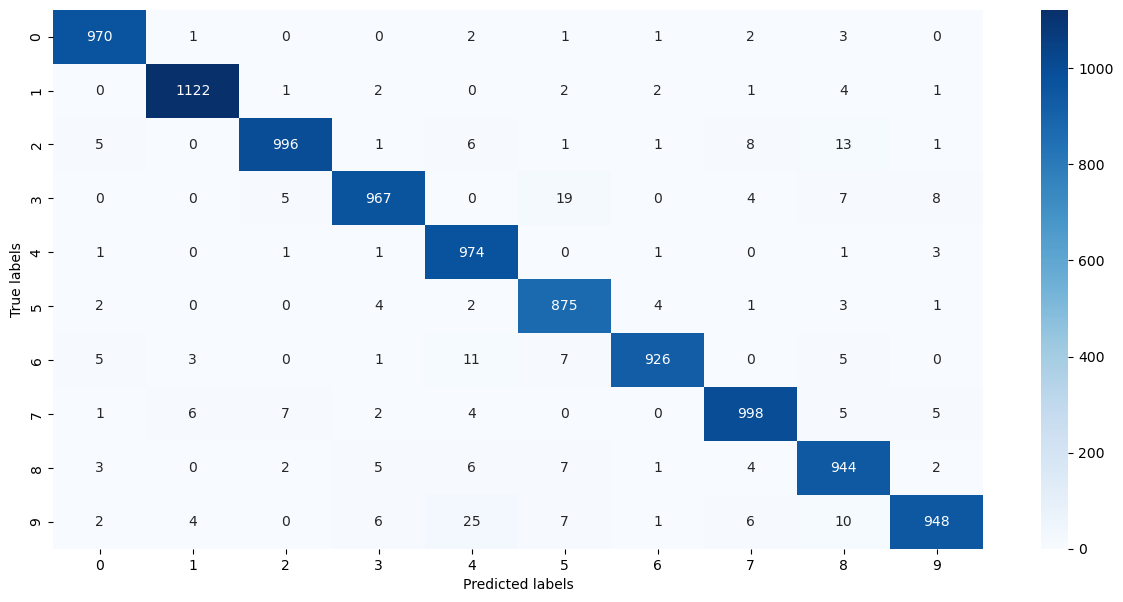

In [45]:
plt.figure(figsize=(15,7))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True labels')
plt.xlabel('Predicted labels')

## Predictive System

In [46]:
input_image_path = 'C:\\Users\\Anuruddha\\Desktop\\ML_projects\\23.MNIST_Digit_Classification_NN\\database\\7.png'
input_image = cv2.imread(input_image_path)

In [47]:
type(input_image)

numpy.ndarray

In [49]:
#cv2.imshow(input_image)

In [56]:
gray_scale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)  # if image if RGB then convert it as Gray scale
input_image_resize = cv2.resize(gray_scale,(28,28))  # if image is diffrent size then convert 28*28 image
input_image_resize = input_image_resize/255  # normalized

image_reshaped = np.reshape(input_image_resize, [1,28,28]) # 1 image 28*28 size

input_prediction = model.predict(image_reshaped)

print(input_prediction)


input_predction_label = np.argmax(input_prediction)

print(input_predction_label)

1/1 [==============================] - 0s 20ms/step
[[2.6227982e-04 9.7027114e-06 9.8088318e-01 9.9997509e-01 2.5470905e-15
  2.1719572e-06 5.9124147e-14 1.0000000e+00 5.8018896e-09 9.7639596e-01]]
7


## FInal predictive system 

In [59]:
input_image_path = input('Input the path of image:')
input_image = cv2.imread(input_image_path)

gray_scale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)  
input_image_resize = cv2.resize(gray_scale,(28,28)) 
input_image_resize_normalized = input_image_resize/255  

image_reshaped = np.reshape(input_image_resize_normalized, [1,28,28])

input_prediction = model.predict(image_reshaped)
input_predction_label = np.argmax(input_prediction)

print("This is number ",input_predction_label)

Input the path of image:C:\\Users\\Anuruddha\\Desktop\\ML_projects\\23.MNIST_Digit_Classification_NN\\database\\7.png
1/1 [==============================] - 0s 18ms/step
this is number  7
